plateau2d => réseau de neurones => prédiction meilleur mouvement

In [21]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn


device = torch.device("cpu")
# device = torch.device("cuda:0")  

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10*10, 10*10)
        self.layer2 = nn.Linear(10*10, 10*10)
        
    def forward(self, x):
        res = self.layer1(x)
        res = torch.relu(res)
        res = self.layer2(res)
        return res
    
    
    
def train(model, data, batch_size=64, weight_decay=0.0,
          optimizer="sgd", learning_rate=0.1, momentum=0.9,
          data_shuffle=True, num_epochs=10):
    
    train_loader = torch.utils.data.DataLoader(data,
                                               batch_size=batch_size,
                                               shuffle=data_shuffle)
    # la loss 
    criterion = nn.CrossEntropyLoss()
    # l'optimiseur
    assert optimizer in ("sgd", "adam")
    if optimizer == "sgd":
        optimizer = optim.SGD(model.parameters(),
                              lr=learning_rate,
                              momentum=momentum,
                              weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(),
                               lr=learning_rate,
                               weight_decay=weight_decay)
    # on track la learning curve avec des listes
    iters, iters_acc, losses, train_acc, val_acc = [], [], [], [], []
    # training
    n = 0 # nombre d'iterations (pour faire des figures)
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            if imgs.size()[0] < batch_size:
                continue

            model.train() # met le modèle en mode train
            out = model(imgs)
            loss = criterion(out, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss

            if n % 50 == 0 :
              train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
              val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
              iters_acc.append(n)

            n += 1

    # plotting
    plt.title("Courbe d'apprentissage")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Courbe d'apprentissage")
    plt.plot(iters_acc, train_acc, label="Train")
    plt.plot(iters_acc, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Précision finale Train : {}".format(train_acc[-1]))
    print("Précision finale Valid : {}".format(val_acc[-1]))
    
    


In [22]:
model = Model()
train(model, mnist_train, batch_size=64, optimizer="sgd", learning_rate=0.1,
      momentum=0., num_epochs=10)

NameError: name 'mnist_train' is not defined

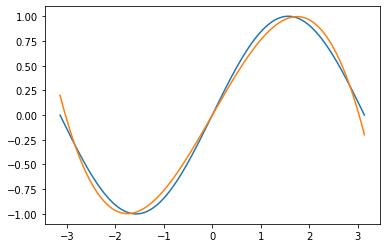

In [15]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.plot(x,a.item() + b.item() * x + c.item() * x ** 2 + d.item() * x ** 3)
plt.show()

In [3]:
import torch

torch.cuda.is_available()

/home/fluka/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


False